In [67]:
# Import libraries
import pandas as pd

In [68]:
# Load data
solar_data_1_raw_df = pd.read_excel('solar_data_1.xlsx', engine='openpyxl')
solar_data_2_raw_df = pd.read_excel('solar_data_2.xlsx', engine='openpyxl')

In [69]:
# Check for the shapes
print(f'Data 1 shape: {solar_data_1_raw_df.shape},\nData 2 shape: {solar_data_2_raw_df.shape}, ')

Data 1 shape: (21, 7),
Data 2 shape: (34, 7), 


In [70]:
# Check for fields
print(f'Data 1 fields: \n{solar_data_1_raw_df.columns},\n\nData 2 fields: \n{solar_data_2_raw_df.columns}, ')

Data 1 fields: 
Index(['state_name', 'number_of_panels_total', 'kw_total', 'kw_median',
       'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total',
       'existing_installs_count'],
      dtype='object'),

Data 2 fields: 
Index(['state_name', 'number_of_panels_total', 'kw_total', 'kw_median',
       'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total',
       'existing_installs_count'],
      dtype='object'), 


In [71]:
# DataFrames are consistent, so they can be concatenated
solar_data_df = pd.concat([solar_data_1_raw_df, solar_data_2_raw_df])
solar_data_df.shape

(55, 7)

In [72]:
# Check with duplicate values and delete them
print(f'Number of duplicated records: {solar_data_df.duplicated().sum()}')

solar_data_df.drop_duplicates(inplace=True)
solar_data_df.shape

Number of duplicated records: 3


(52, 7)

In [73]:
# Examine DataFrame
# 1- There are some miising values
# 2- DataType are correct
solar_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      52 non-null     int64  
 2   kw_total                    52 non-null     float64
 3   kw_median                   51 non-null     float64
 4   yearly_sunlight_kwh_median  51 non-null     float64
 5   yearly_sunlight_kwh_total   52 non-null     float64
 6   existing_installs_count     51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [74]:
# Since the DataFrame consists of states for only record and all states are present, the missing value in this column should be an outlier and will be removed.

solar_data_df['state_name'].value_counts()

solar_data_df.dropna(subset=['state_name'], inplace=True)
solar_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      51 non-null     int64  
 2   kw_total                    51 non-null     float64
 3   kw_median                   50 non-null     float64
 4   yearly_sunlight_kwh_median  50 non-null     float64
 5   yearly_sunlight_kwh_total   51 non-null     float64
 6   existing_installs_count     50 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


array([[<AxesSubplot:title={'center':'kw_median'}>,
        <AxesSubplot:title={'center':'yearly_sunlight_kwh_median'}>],
       [<AxesSubplot:title={'center':'existing_installs_count'}>,
        <AxesSubplot:>]], dtype=object)

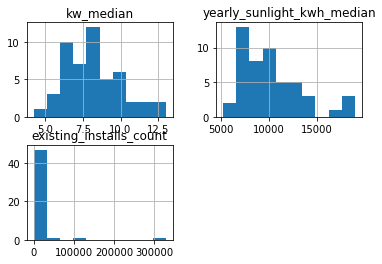

In [75]:
# Check the distribution of fields with missing values
solar_data_df[['kw_median', 'yearly_sunlight_kwh_median', 'existing_installs_count']].hist()

In [76]:
# Both 'kw_median' and 'yearly_sunlight_kwh_median' are somehow sckewd normal distribution, so the missing value will be filled with median.
solar_data_df['kw_median'].fillna(solar_data_df['kw_median'].median(), inplace=True)
solar_data_df['yearly_sunlight_kwh_median'].fillna(solar_data_df['yearly_sunlight_kwh_median'].median(), inplace=True)
solar_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      51 non-null     int64  
 2   kw_total                    51 non-null     float64
 3   kw_median                   51 non-null     float64
 4   yearly_sunlight_kwh_median  51 non-null     float64
 5   yearly_sunlight_kwh_total   51 non-null     float64
 6   existing_installs_count     50 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [77]:
# 'existing_installs_count' is concentrated on an specific region, so the missing value will be filled with mode.
solar_data_df['existing_installs_count'].fillna(solar_data_df['existing_installs_count'].mode(), inplace=True)
solar_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 30
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      51 non-null     int64  
 2   kw_total                    51 non-null     float64
 3   kw_median                   51 non-null     float64
 4   yearly_sunlight_kwh_median  51 non-null     float64
 5   yearly_sunlight_kwh_total   51 non-null     float64
 6   existing_installs_count     51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [78]:
# Examine correlation
solar_data_df.corr()

# it seems that 'median' values and 'total' values have good corellation with each other.
#solar_data_df[['number_of_panels_total', 'kw_total', 'yearly_sunlight_kwh_total', 'existing_installs_count']].corr()
#solar_data_df[['kw_median', 'yearly_sunlight_kwh_median']].corr()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
number_of_panels_total,1.000000,1.000000,0.292546,0.303214,0.995478,0.818074
kw_total,1.000000,1.000000,0.292546,0.303214,0.995478,0.818074
kw_median,0.292546,0.292546,1.000000,0.920713,0.318872,0.273429
yearly_sunlight_kwh_median,0.303214,0.303214,0.920713,1.000000,0.343703,0.326113
yearly_sunlight_kwh_total,0.995478,0.995478,0.318872,0.343703,1.000000,0.855928
existing_installs_count,0.818074,0.818074,0.273429,0.326113,0.855928,1.000000


,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
1,Massachusetts,52098838,1.302471e+07,5.75,6571.621021,1.486191e+10,15331.0
12,New York,121650217,3.041255e+07,6.25,7195.039160,3.492613e+10,19979.0
6,Colorado,55174753,1.379369e+07,6.75,9690.190088,1.970758e+10,24140.0
12,Hawaii,15969111,3.992278e+06,13.00,19004.649878,6.004369e+09,25414.0
3,Arizona,114697808,2.867445e+07,11.75,18974.796637,4.639329e+10,39553.0
10,Florida,305682374,7.642059e+07,12.75,17250.183057,1.050627e+11,104123.0
5,California,531022657,1.327557e+08,9.75,14460.077979,1.980163e+11,328899.0


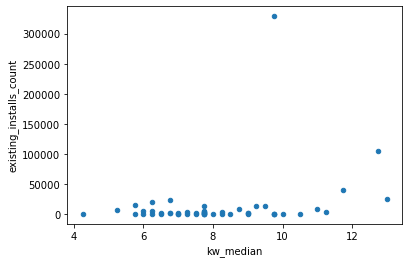

In [59]:
# Eamice the least correlation
solar_data_df.plot.scatter(x='kw_median', y='existing_installs_count')

# it seems we have some outliers
q1 = solar_data_df['existing_installs_count'].quantile(0.25)
q3 = solar_data_df['existing_installs_count'].quantile(0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5 * iqr
lower_boundary = q1 - 1.5 * iqr
outliers_df = solar_data_df.loc[(solar_data_df['existing_installs_count'] < lower_boundary) | (solar_data_df['existing_installs_count'] > upper_boundary)]

outliers_df.sort_values(['existing_installs_count'])

In [79]:
# Save cleaned data
solar_data_df.to_excel('cleaned_solar_data.xlsx', index=False)

In [80]:
# Summary
"""
Two excel files have been loaded, merged and the duplications have been removed.
Missing values have been either droped or filled.
Then, the data has been exported for downstream users.

It seems thet solar energy is very popular in 'California' and 'Florida', that may be related to expensive electricity or govermental incentives.
"""

"\nTwo excel files have been loaded, merged and the duplications have been removed.\nMissing values have been either droped or filled.\nThen, the data has been exported for downstream users.\n\nIt seems thet solar energy is very popular in 'California' and 'Florida', that may be related to expensive electricity or govermental incentives.\n"